In [1]:
# Program Pengklasifisian Ikan Cupang Berdasarkan Bentuk Ekor
# 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import glob
import time
import cv2
import os
%matplotlib inline

In [2]:
# memanggil data set(data training)
dir_vailtail = "./dataset-cupang/vailtail/*.jpg"
dir_doubletail = "./dataset-cupang/doubletail/*.jpg"
dir_combtail = "./dataset-cupang/combtail/*.jpg"
dir_halfmoon = "./dataset-cupang/halfmoon/*.jpg"

files =glob.glob(dir_vailtail)
vailtail = []
for f1 in files:
    img = cv2.imread(f1)
    resize = cv2.resize(img,(100,100))
    vailtail.append(resize)
files =glob.glob(dir_doubletail)
doubletail = []
for f1 in files:
    img = cv2.imread(f1)
    resize = cv2.resize(img,(100,100))
    doubletail.append(resize)
files =glob.glob(dir_combtail)
combtail = []
for f1 in files:
    img = cv2.imread(f1)
    resize = cv2.resize(img,(100,100))
    combtail.append(resize)
files =glob.glob(dir_halfmoon)
halfmoon = []
for f1 in files:
    img = cv2.imread(f1)
    resize = cv2.resize(img,(100,100))
    halfmoon.append(resize)

In [3]:
# mengembalikan nilai array training, (index yang ditampung,lebar gambar, tinggi gambar, dimensi)
[np.shape(vailtail), np.shape(doubletail), np.shape(combtail), np.shape(halfmoon)]

[(20, 100, 100, 3), (20, 100, 100, 3), (20, 100, 100, 3), (20, 100, 100, 3)]

In [4]:
# memanggil data uji
dir_vailtail_uji = "./dataset-cupang/uji/vailtail/*.jpg"
dir_doubletail_uji = "./dataset-cupang/uji/doubletail/*.jpg"
dir_combtail_uji = "./dataset-cupang/uji/combtail/*.jpg"
dir_halfmoon_uji = "./dataset-cupang/uji/halfmoon/*.jpg"

files =glob.glob(dir_vailtail_uji)
vailtail_uji = []
for f1 in files:
    img = cv2.imread(f1)
    resize = cv2.resize(img,(100,100))
    vailtail_uji.append(resize)
files =glob.glob(dir_doubletail_uji)
doubletail_uji = []
for f1 in files:
    img = cv2.imread(f1)
    resize = cv2.resize(img,(100,100))
    doubletail_uji.append(resize)
files =glob.glob(dir_combtail_uji)
combtail_uji = []
for f1 in files:
    img = cv2.imread(f1)
    resize = cv2.resize(img,(100,100))
    combtail_uji.append(resize)
files =glob.glob(dir_halfmoon_uji)
halfmoon_uji = []
for f1 in files:
    img = cv2.imread(f1)
    resize = cv2.resize(img,(100,100))
    halfmoon_uji.append(resize)

In [5]:
# mengembalikan nilai array uji, (index yang ditampung,lebar gambar, tinggi gambar, dimensi)
[np.shape(vailtail_uji), np.shape(doubletail_uji), np.shape(combtail_uji), np.shape(halfmoon_uji)]

[(5, 100, 100, 3), (5, 100, 100, 3), (5, 100, 100, 3), (5, 100, 100, 3)]

In [6]:
# menjdikan semua data training menjadi 1 array
X = np.vstack((vailtail,doubletail,combtail,halfmoon)).astype(np.float32)

In [7]:
# mengembalikan nilai array training
X.shape

(80, 100, 100, 3)

In [8]:
print(X)

[[[[183. 188. 187.]
   [133. 132. 134.]
   [185. 198. 206.]
   ...
   [ 65.  61.  50.]
   [ 67.  66.  56.]
   [ 80.  82.  76.]]

  [[183. 190. 187.]
   [111. 114. 119.]
   [175. 188. 196.]
   ...
   [ 64.  59.  50.]
   [ 67.  65.  55.]
   [ 73.  77.  71.]]

  [[175. 178. 169.]
   [104. 108. 113.]
   [171. 183. 193.]
   ...
   [ 64.  58.  51.]
   [ 67.  63.  58.]
   [ 76.  79.  70.]]

  ...

  [[ 72.  73.  64.]
   [ 97. 100.  91.]
   [ 76.  78.  78.]
   ...
   [ 73.  97. 117.]
   [ 69.  93. 113.]
   [ 64.  91. 112.]]

  [[ 75.  76.  67.]
   [108. 109.  99.]
   [100. 103. 101.]
   ...
   [ 76. 104. 121.]
   [ 76. 102. 119.]
   [ 71. 101. 120.]]

  [[ 69.  70.  60.]
   [105. 106.  96.]
   [ 85.  86.  84.]
   ...
   [ 75.  99. 119.]
   [ 68.  94. 111.]
   [ 65.  93. 110.]]]


 [[[112. 138.  69.]
   [107. 142.  64.]
   [120. 214. 172.]
   ...
   [ 98. 191. 145.]
   [181. 192. 120.]
   [107. 154.  76.]]

  [[145. 212. 146.]
   [104. 143.  58.]
   [112. 203. 160.]
   ...
   [119. 184. 129.]
 

In [9]:
X=X/255.0

In [10]:
X.shape

(80, 100, 100, 3)

In [11]:
X_uji = np.vstack((vailtail_uji, doubletail_uji, combtail_uji, halfmoon_uji)).astype(np.float32)

In [12]:
X_uji.shape

(20, 100, 100, 3)

In [13]:
X_uji = X_uji/255.0

In [14]:
print(X_uji)

[[[[0.37254903 0.6392157  0.56078434]
   [0.36078432 0.5294118  0.42745098]
   [0.30980393 0.43137255 0.30980393]
   ...
   [0.22352941 0.24313726 0.09019608]
   [0.22352941 0.2509804  0.09019608]
   [0.21960784 0.2509804  0.09019608]]

  [[0.42352942 0.75686276 0.68235296]
   [0.4        0.6431373  0.5529412 ]
   [0.30588236 0.5019608  0.39215687]
   ...
   [0.23137255 0.25490198 0.09411765]
   [0.22745098 0.25490198 0.09411765]
   [0.22745098 0.25882354 0.09803922]]

  [[0.45490196 0.8235294  0.7647059 ]
   [0.43137255 0.73333335 0.6509804 ]
   [0.3529412  0.59607846 0.49803922]
   ...
   [0.24705882 0.27450982 0.10588235]
   [0.23529412 0.26666668 0.10588235]
   [0.23529412 0.26666668 0.10588235]]

  ...

  [[0.16078432 0.23137255 0.16862746]
   [0.20784314 0.2901961  0.19215687]
   [0.29411766 0.40392157 0.26666668]
   ...
   [0.14117648 0.58431375 0.23529412]
   [0.15294118 0.56078434 0.23921569]
   [0.15294118 0.50980395 0.21568628]]

  [[0.14117648 0.21568628 0.15294118]
   [0.1

In [15]:
label_vailtail = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
label_doubletail = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
label_combtail = np.array([2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2])
label_halfmoon = np.array([3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3])

In [16]:
# mengmebalikan nilai array dengan label
[np.shape(label_vailtail), np.shape(label_doubletail), np.shape(label_combtail), np.shape(label_halfmoon)]

[(20,), (20,), (20,), (20,)]

In [17]:
# menyimpan keseluruhan array label
y = np.hstack((label_vailtail, label_doubletail, label_combtail, label_halfmoon))

In [18]:
y.shape

(80,)

In [19]:
label_vailtail_uji = np.array([0,0,0,0,0])
label_doubletail_uji = np.array([1,1,1,1,1])
label_combtail_uji = np.array([2,2,2,2,2])
label_halfmoon_uji = np.array([3,3,3,3,3])

In [20]:
y_uji = np.hstack((label_vailtail_uji, label_doubletail_uji, label_combtail_uji, label_halfmoon_uji))

In [21]:
y_uji.shape

(20,)

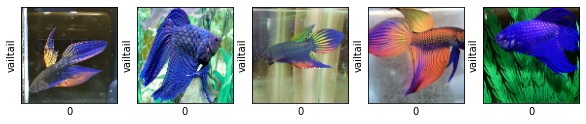

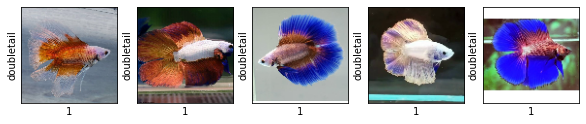

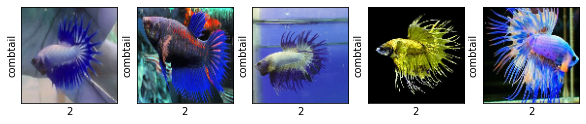

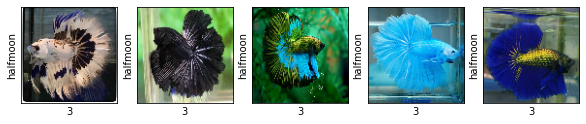

In [22]:
class_name = ['vailtail', 'doubletail', 'combtail', 'halfmoon']
# menampilkan gambar yang ada di array training
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(vailtail[i], cmap=plt.cm.binary)
    plt.xlabel(label_vailtail[i])
    plt.ylabel(class_name[0])
plt.show()
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(doubletail[i], cmap=plt.cm.binary)
    plt.xlabel(label_doubletail[i])
    plt.ylabel(class_name[1])
plt.show()
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(combtail[i], cmap=plt.cm.binary)
    plt.xlabel(label_combtail[i])
    plt.ylabel(class_name[2])
plt.show()
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(halfmoon[i], cmap=plt.cm.binary)
    plt.xlabel(label_halfmoon[i])
    plt.ylabel(class_name[3])
plt.show()

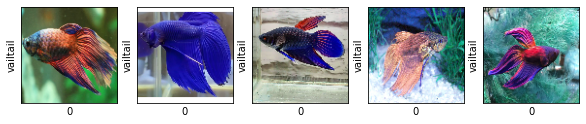

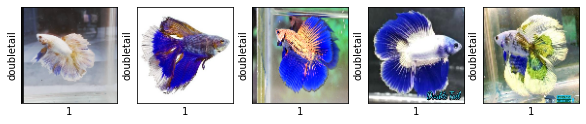

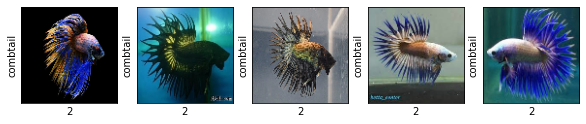

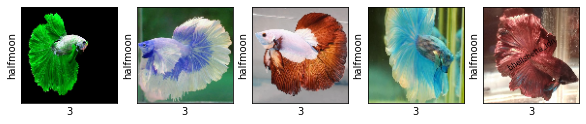

In [23]:
class_name = ['vailtail', 'doubletail', 'combtail', 'halfmoon']
# menampilkan gambar uji yang ada di array
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(vailtail_uji[i], cmap=plt.cm.binary)
    plt.xlabel(label_vailtail_uji[i])
    plt.ylabel(class_name[0])
plt.show()
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(doubletail_uji[i], cmap=plt.cm.binary)
    plt.xlabel(label_doubletail_uji[i])
    plt.ylabel(class_name[1])
plt.show()
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(combtail_uji[i], cmap=plt.cm.binary)
    plt.xlabel(label_combtail_uji[i])
    plt.ylabel(class_name[2])
plt.show()
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(halfmoon_uji[i], cmap=plt.cm.binary)
    plt.xlabel(label_halfmoon_uji[i])
    plt.ylabel(class_name[3])
plt.show()

In [24]:
# inisialisasi filter menjdi 4 layers
model = models.Sequential()
model.add(layers.Conv2D(100, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(200, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(200, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(200, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(200, (3, 3), activation='relu'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 100)       2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 100)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 200)       180200    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 200)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 200)       360200    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 200)      0

In [26]:
# filter meyetarakan
model.add(layers.Flatten())
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(5))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 100)       2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 100)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 200)       180200    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 200)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 200)       360200    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 200)      0

In [28]:
# melakukan pengklasifikasian dengan modul keras 
# epochsnya bisa ditentukan sesuai keinginan, semakin banyak epocs semakin besar pula accuray yang akan didapat
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(X,y, epochs=20,
                    validation_data=(X_uji, y_uji))

Epoch 1/20
3/3 [==============================] - 11s 2s/step - loss: 1.6212 - accuracy: 0.2375 - val_loss: 1.4403 - val_accuracy: 0.2500
Epoch 2/20
3/3 [==============================] - 7s 2s/step - loss: 1.4512 - accuracy: 0.2125 - val_loss: 1.4468 - val_accuracy: 0.2500
Epoch 3/20
3/3 [==============================] - 7s 2s/step - loss: 1.4275 - accuracy: 0.3000 - val_loss: 1.4453 - val_accuracy: 0.2500
Epoch 4/20
3/3 [==============================] - 7s 2s/step - loss: 1.4102 - accuracy: 0.2500 - val_loss: 1.3926 - val_accuracy: 0.2500
Epoch 5/20
3/3 [==============================] - 7s 2s/step - loss: 1.3427 - accuracy: 0.3625 - val_loss: 1.4334 - val_accuracy: 0.2500
Epoch 6/20
3/3 [==============================] - 8s 2s/step - loss: 1.3701 - accuracy: 0.3000 - val_loss: 1.4309 - val_accuracy: 0.2500
Epoch 7/20
3/3 [==============================] - 8s 2s/step - loss: 1.3182 - accuracy: 0.4125 - val_loss: 1.4383 - val_accuracy: 0.3500
Epoch 8/20
3/3 [========================

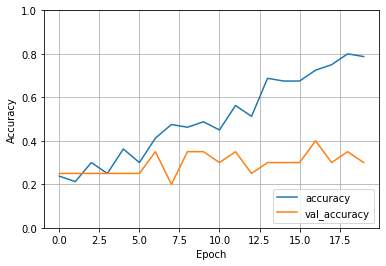

In [29]:
# menampilkan hasil pengklasifikasian dan rata-rata akurasi yang diperoleh
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.grid()

In [30]:
# Evaluasi modelnya
test_loss, test_acc = model.evaluate(X_uji, y_uji, verbose=2)
# Tampilkan hasil tes akurasi
print('Hasil akurasi pengujian =',test_acc)

1/1 - 1s - loss: 1.7656 - accuracy: 0.3000 - 612ms/epoch - 612ms/step
Hasil akurasi pengujian = 0.30000001192092896


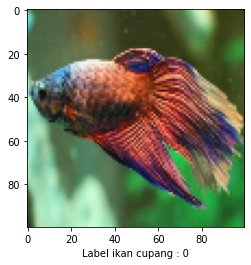

Hasil prediksi model: 1


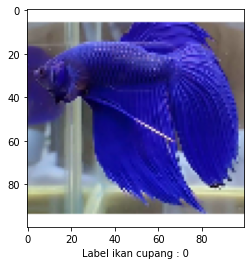

Hasil prediksi model: 2


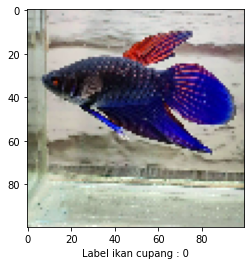

Hasil prediksi model: 2


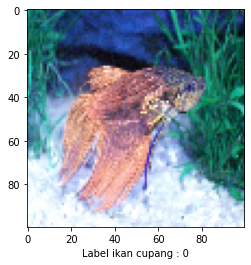

Hasil prediksi model: 1


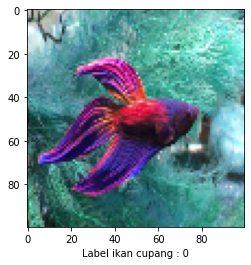

Hasil prediksi model: 1


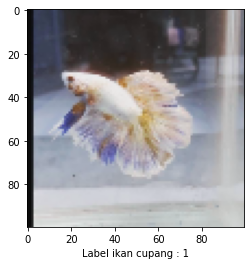

Hasil prediksi model: 1


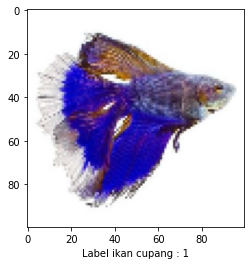

Hasil prediksi model: 0


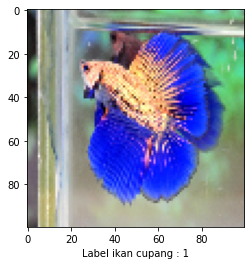

Hasil prediksi model: 2


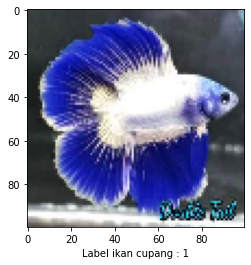

Hasil prediksi model: 1


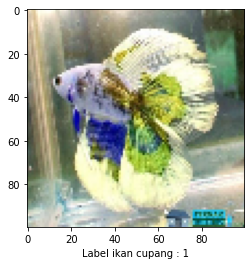

Hasil prediksi model: 0


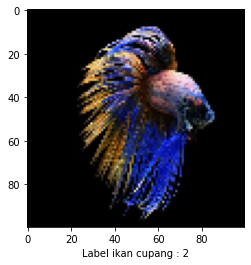

Hasil prediksi model: 2


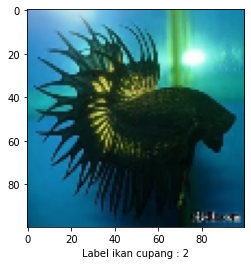

Hasil prediksi model: 2


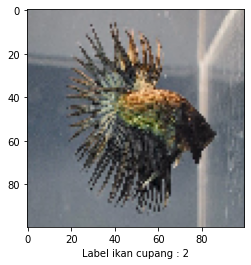

Hasil prediksi model: 2


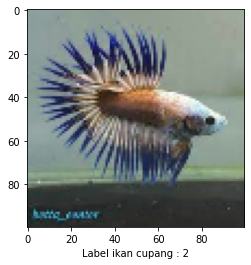

Hasil prediksi model: 1


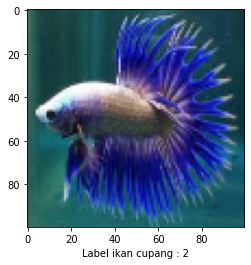

Hasil prediksi model: 2


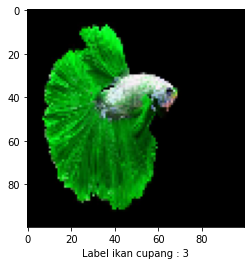

Hasil prediksi model: 2


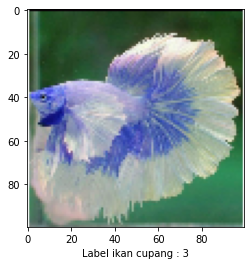

Hasil prediksi model: 1


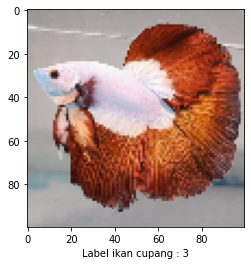

Hasil prediksi model: 1


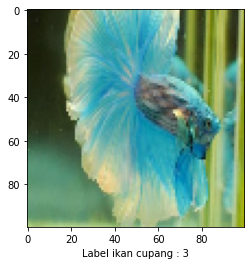

Hasil prediksi model: 1


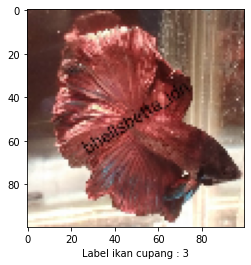

Hasil prediksi model: 1


In [31]:
# Visualisasikan hasil prediksi pengenalan ikan.
import matplotlib.pyplot as plt
# Memprediksi 20 gambar dari Data Uji.
n_images = 20
test_images = X_uji[:n_images]
test_label = y_uji[:n_images]
predictions = model.predict(test_images)
# Menampilkan gambar dan prediksi model.
for i in range(n_images):
 plt.imshow(test_images[i])
 plt.xlabel("Label ikan cupang : %i" % test_label[i])
 plt.show()
 print("Hasil prediksi model: %i" % np.argmax(predictions[i]))

In [32]:
# benar 13/20 epochs 20
# benar 10/20 epochs 10
# benar 9/20 epochs 20